In [1]:
#importing module spotipy to make api calls to spotify
import spotipy
# module to extract song from url
import urllib
# OAuth Credenials
from spotipy.oauth2 import SpotifyClientCredentials
from multiprocessing import Process, Queue
import pandas as pd 
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn import mixture
from sklearn.cluster import KMeans
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from scipy.optimize import linprog
from pyemd import emd

client_credentials_manager = SpotifyClientCredentials(client_id='4a1a457d14c0445a96e7021a5523905b', client_secret='45b186d601544fdcbb4fe07c7b23cce5')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [2]:
# The below cells contain code for GMMs which need to be run once.
# This data is saved in clustering.csv .Later  this df is used to calculate emd

In [3]:
# tracks_total contains audio tracks for 14887 songs
import glob, os
os.chdir("/Users/sonumehta/Desktop/Sem2/Capstone/PyAudio_tools/pyAudioAnalysis/tracks_total")
track_ids  = []
for file in glob.glob("*.wav"):
    track_ids.append(file[5:-4])



In [4]:
len(track_ids)
print(track_ids[16])

00pQYMt0mNh6fAWhgvAdMA


In [5]:
# reading data from csv
import glob, os
os.chdir("/Users/sonumehta/Desktop/Sem2/Capstone/PyAudio_tools/pyAudioAnalysis/tracks_total")

data_frame1 = pd.read_csv('all_tracks_data.csv')
data_frame1.head()


,Unnamed: 0,id,popularity,preview_url
0,0,5bF6crgJa5Q58IWgbdUbuO,48,https://p.scdn.co/mp3-preview/8ca5cd7ee7279899...
1,1,5BFMUpscSbYVT2V9j5d275,46,https://p.scdn.co/mp3-preview/0c6334f2acda0ab8...
2,2,5bFxSkRAr1kiESBIkArOiP,24,https://p.scdn.co/mp3-preview/8beed2be330e16ce...
3,3,5bG5GUKVJztKR5nff1CwUp,31,https://p.scdn.co/mp3-preview/7d082bccb3e53698...
4,4,5BgC5vVuhfWHHawbcXRr7h,31,https://p.scdn.co/mp3-preview/2984ca0f925048f2...


In [21]:
# extracting  features at each timestamp and taking the mean  
clustering_df = pd.DataFrame()
clustering_df['id1'] = 0
clustering_df['mean'] = 0
clustering_df['var'] = 0
clustering_df['weight'] = 0
# cluster assigment
clustering_df['y'] = 0

row = 0
row_list = []
# clusetring using kmeans
for i in range(data_frame1['id'].shape[0]):
    id1  =data_frame1['id'].iloc[i]
    name = "track"+ id1+".wav_st.csv"

    a  = pd.read_csv(name, header = None)
    print(a.shape)
    if (np.ravel(a).shape[0]) == 1020:
        
        
        
        clf = mixture.GaussianMixture(n_components=4, covariance_type='full')
        clf.fit(a)
        #clustering_df.loc[row] = [id1, clf.means_, clf.covariances_, clf.weights_]
        row_list.append([id1, clf.means_, clf.covariances_, clf.weights_, clf.predict(a)])

        row+=1
        
    break
clustering_df_4 = pd.DataFrame(row_list)        
#clustering_df.to_csv("clustering_data_16.csv")        


(30, 34)


In [6]:
clustering_df = pd.read_pickle("/Users/sonumehta/Desktop/Sem2/Capstone/PyAudio_tools/pyAudioAnalysis/tracks_total/Clustering_pickle_4")
clustering_df.head()

,id,means,var,weights,y
0,5bF6crgJa5Q58IWgbdUbuO,"[[0.0324534947882, 0.0232605357739, 3.12293189...","[[[4.19586290687e-05, -1.1575460579e-05, 0.000...","[0.6, 0.0666666666667, 0.166666666667, 0.16666...","[0, 0, 0, 0, 0, 2, 1, 1, 3, 3, 3, 0, 2, 2, 0, ..."
1,5BFMUpscSbYVT2V9j5d275,"[[0.0781219528788, 0.0688425814589, 3.15123236...","[[[5.24945067971e-05, -2.72043591698e-05, 8.89...","[0.333333333333, 0.3, 0.2, 0.166666666667]","[2, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 3, ..."
2,5bFxSkRAr1kiESBIkArOiP,"[[0.059111317717, 0.102087157318, 3.2537810706...","[[[0.000165105059827, 7.3669213458e-05, 0.0003...","[0.133333333333, 0.2, 0.166666666667, 0.5]","[3, 3, 3, 0, 2, 2, 3, 3, 3, 3, 0, 1, 1, 1, 0, ..."
3,5bG5GUKVJztKR5nff1CwUp,"[[0.0331526791991, 0.0119810774695, 3.09705938...","[[[7.33860605294e-05, -3.20977106883e-06, 0.00...","[0.266666666667, 0.0666666666667, 0.3, 0.36666...","[2, 2, 2, 3, 0, 0, 0, 2, 3, 2, 3, 0, 0, 3, 3, ..."
4,5BgC5vVuhfWHHawbcXRr7h,"[[0.0701444477199, 0.0532890612875, 3.05055710...","[[[0.000950877668389, -7.72290896836e-05, -0.0...","[0.333333333333, 0.266666666667, 0.23333333333...","[0, 0, 0, 0, 3, 0, 0, 1, 1, 2, 1, 1, 1, 3, 1, ..."


In [7]:
clustering_df.shape

(14887, 5)

In [9]:
# reading data with features extracted
mean_features_data = pd.read_csv('/Users/sonumehta/Desktop/Sem2/Capstone/PyAudio_tools/pyAudioAnalysis/tracks_total/mean_features.csv').drop('Unnamed: 0', axis = 1)
mean_features_data.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.034331,0.027217,3.032119,0.100629,0.144193,0.094455,0.001504,0.038918,-20.449001,2.142264,...,0.000298,0.000543,0.000259,0.000311,0.000444,0.000484,0.000725,0.000527,0.000368,0.000397
1,0.080249,0.063066,3.154067,0.179655,0.186982,0.676640,0.000210,0.105036,-17.555998,0.956587,...,0.000607,0.000924,0.001856,0.000515,0.001718,0.001182,0.001021,0.001049,0.001231,0.000844
2,0.055129,0.094738,3.248476,0.168248,0.191879,0.350973,0.000328,0.043137,-17.683683,2.139082,...,0.000728,0.001474,0.000988,0.001536,0.002911,0.000818,0.001129,0.000644,0.001056,0.001052
3,0.035782,0.026939,3.152187,0.107575,0.149364,0.172294,0.001276,0.039265,-20.296906,2.452144,...,0.001188,0.001199,0.002105,0.000745,0.002304,0.003827,0.003836,0.004233,0.003712,0.003389
4,0.057428,0.062834,3.061450,0.131380,0.152100,0.427569,0.000472,0.075542,-17.584650,1.820407,...,0.001268,0.000912,0.001501,0.002080,0.001376,0.002700,0.004059,0.001817,0.001280,0.002206


In [10]:
# Kmeans clustering of the entire dataset into 10 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(mean_features_data)
cl = []
for i in range(1,10):
    cl.append(mean_features_data[kmeans.labels_ == i].shape[0])
#kmeans.predict(mean_features_data.iloc[0].reshape(1, -1))
print(cl)

[1438, 94, 3596, 517, 2378, 789, 1983, 660, 202]


In [55]:
# code to plot songs on PCA plot with vantnage points
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(mean_features_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [65]:
pca_data = pca.transform(mean_features_data)
pca_data.shape
vantage_pts = pca.transform(kmeans.cluster_centers_)
#kmeans.predict(mean_features_data.iloc[0].reshape(1, -1))
clnew = []
for i in range(1,10):
    clnew.append(pca.transform(mean_features_data[kmeans.labels_ == i]))


(1438, 2)

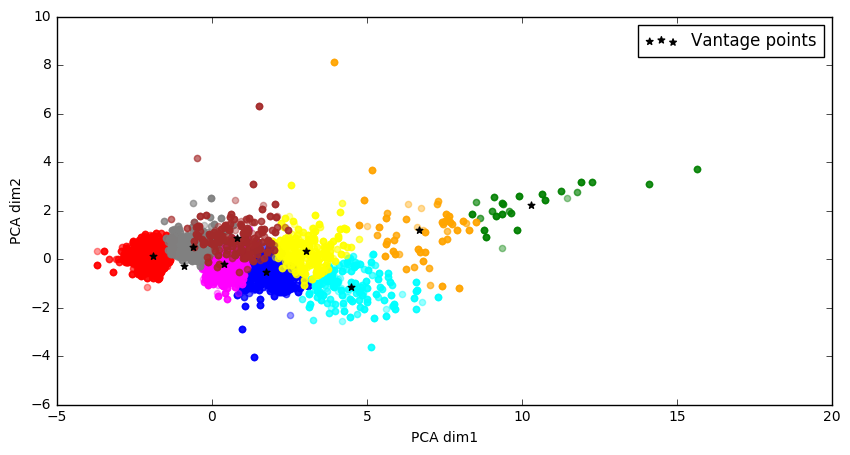

In [116]:
#plt.scatter(pca_data[:,0], pca_data[:,1],alpha = 0.3, color = 'red', label = 'Tracks')
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'gray', 'brown', 'orange'] 
plt.figure(figsize=(10,5))
for i in range(0,9):
    plt.scatter(clnew[i][:,0], clnew[i][:,1], alpha = 0.4, color = colors[i])
        
plt.scatter(vantage_pts[:,0], vantage_pts[:,1], color = 'black', marker = '*', s = 25, label = 'Vantage points')
plt.legend(loc = 'best')
plt.xlabel('PCA dim1')
plt.ylabel('PCA dim2')
plt.savefig('vantagept.png')
plt.show()

**Earth Movers Distance**

In [13]:
# KL divergence distance to calculate distance betweeb clusters
def distance_between_clusters(mu_1, sig_1, mu_2, sig_2):
    
    means_diff_1 = mu_1- mu_2
    means_diff_2 = mu_2- mu_1
    sig_1_inv = np.linalg.inv(sig_1)
    sig_2_inv = np.linalg.inv(sig_2)
    dist = np.trace(np.dot(np.linalg.inv(sig_1) , sig_2)) + np.trace(np.dot(np.linalg.inv(sig_2) , sig_1)) + np.dot(np.dot(means_diff_1.T,sig_1_inv),means_diff_1) +np.dot(np.dot(means_diff_2.T,sig_2_inv),means_diff_2) 
    return dist

# # sample run for two clusters
# sig_1 = clustering_df.iloc[0]['var'][0]
# sig_2 = clustering_df.iloc[1]['var'][0]
# mu_1 = clustering_df.iloc[0]['means'][0]
# mu_2 = clustering_df.iloc[1]['means'][0]
# distance_between_clusters(mu_1, sig_1, mu_2, sig_2)

In [14]:
# code to calculate emd between two songs using Linear programming approach
def calc_emd(signature_1, signature_2):
    p_list = []
    for i in signature_1['weights']:
        p_list.append(i)
    
    q_list = []
    for i in signature_2['weights']:
        q_list.append(i)
    
    clus_1 = signature_1['means'].shape[0]
    clus_2 = signature_2['means'].shape[0]
    dist = np.zeros((clus_1*clus_2))
    p_list = np.array(p_list)
    q_list = np.array(q_list)
    col = 0
    for i in range(0, clus_1):
        for j in range(0, clus_2):
            dist[col]=distance_between_clusters(signature_1['means'][i],signature_1['var'][i], signature_2['means'][j], signature_2['var'][j])
            col+=1
    #clus_1 = clus_2 = 4
    A_ub = np.zeros((clus_1+clus_2, clus_1*clus_2))
    j = 0
    for i in range(0, clus_1):
        A_ub[i][j:j+clus_2] = 1
        j+=clus_2

    #print(A_ub)
    k = 0
    for i in range(clus_1, clus_1+clus_2):
        
        for j in range(k, clus_1*clus_2, clus_2):
            
            A_ub[i][j] = 1
        k = k+1
    #print(A_ub)
    b_ub = np.zeros(clus_1 + clus_2)
    b_ub[0:clus_1] = p_list
    b_ub[clus_1:] = q_list
    A_eq = np.ones((1,clus_1*clus_2))
    b_eq = min(np.sum(p_list), np.sum(q_list))

    res = linprog(c = dist,A_ub = A_ub,b_ub= b_ub,A_eq = A_eq, b_eq = b_eq,options={"disp": False})
    
    f_star = np.array(res['x'])

    num = np.dot(f_star, dist)
    denom = np.sum(f_star)
    #print(f_star, num, denom)
    return(num/denom)


    
# example for two songs

# p_list = np.array([0.2, 0.8])
# q_list = np.array([0.8, 0.2])

# c = np.array([[0,1],[1,0]])
# c = np.transpose(np.ravel(c))
# print("c",c)
# A_ub  = np.array([[1,1,0,0], [0,0,1,1], [1,0,1,0], [0,1,0,1]])
# print("A_ub",A_ub)
# b_ub  =np.array([p_list[0], p_list[1], q_list[0], q_list[1]])
# b_ub = np.transpose(b_ub)
# print("b_ub ", b_ub)
# A_eq = np.array([[1,1,1,1]])
# b_eq = min(np.sum(p_list), np.sum(q_list))
# #print(A_eq, b_eq)
# res = linprog(c = c,A_ub = A_ub,b_ub= b_ub,A_eq = A_eq, b_eq = b_eq,options={"disp": True})
# f_star = np.array(res['x'])
# num = np.dot(f_star, c)
# denom = np.sum(f_star)
# print(num/denom)




raw audio feature extraction
https://github.com/tyiannak/pyAudioAnalysis/wiki/2.-General

In [11]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import audioFeatureExtraction
import matplotlib.pyplot as plt
import numpy as np
import glob, os
# track-ids for the entire dataset
track_id = pd.read_csv('/Users/sonumehta/Desktop/Sem2/Capstone/PyAudio_tools/pyAudioAnalysis/tracks_total/track_id_new.csv')
track_id.head()
# os.chdir("/Users/sonumehta/Desktop/Sem2/Capstone/PyAudio_tools/pyAudioAnalysis/raw_audio")

# features = []

# for file in glob.glob("*.wav"):
#     [Fs, x] = audioBasicIO.readAudioFile("track0A71OLE9BN4ImZ3XTCOHP7.wav");
#     F = audioFeatureExtraction.stFeatureExtraction(x[:,1], Fs, 1* Fs, 1*Fs);
    
#     features.append(np.mean(F, axis = 1))
#     break
# print(np.array(features).shape)
    
# features is array with 12 song having 24 features each.



,Unnamed: 0,trackid
0,0,5bF6crgJa5Q58IWgbdUbuO
1,1,5BFMUpscSbYVT2V9j5d275
2,2,5bFxSkRAr1kiESBIkArOiP
3,3,5bG5GUKVJztKR5nff1CwUp
4,4,5BgC5vVuhfWHHawbcXRr7h


In [16]:
new_df = clustering_df
def return_candidate_songs(seed_song): # seed_song is the track_id
    
    # extract raw audio #
    track_spotify = sp.tracks([seed_song])['tracks'][0]
        
    
    #print(track_spotify['preview_url'])  
    urllib.urlretrieve(track_spotify['preview_url'], "track"+track_spotify['id']+".wav")
                    
    # extract acoustic features
    
    [Fs, x] = audioBasicIO.readAudioFile("track"+track_spotify['id']+".wav");
    F = audioFeatureExtraction.stFeatureExtraction(x[:,1], Fs, 1* Fs, 1*Fs);
#    F = pd.read_csv('/Users/sonumehta/Desktop/Sem2/Capstone/PyAudio_tools/pyAudioAnalysis/raw_audio/7k2lqQ4Vt9435X24qUISki.csv', header = None)
    vp_nearest = kmeans.predict(np.mean(F, axis = 1).reshape(1,-1))
    F = F.T
    #print(F.shape)
    
    clf = mixture.GaussianMixture(n_components=4, covariance_type='full')
    clf.fit(F)
        #clustering_df.loc[row] = [id1, clf.means_, clf.covariances_, clf.weights_]

    rowlist = [[seed_song , clf.means_, clf.covariances_, clf.weights_, clf.predict(F)]]
    seed_song_df = pd.DataFrame(rowlist)

    seed_song_df.columns = ['id', 'means', 'var', 'weights','y']

    
    
    #     # predict the nearest vantage point


    
    #print(vp_nearest)
    #All songs in that cluster
    nearest_song_index = np.where(kmeans.labels_ == vp_nearest)
    
    
    
    
    
    n = np.array(nearest_song_index).shape[1]
    
    emd_list = []
    signature_song_1 = (seed_song_df.iloc[0])
    p_list=  seed_song_df.iloc[0]['weights']
    for song_index in range(0,n):

        q = nearest_song_index[0][song_index]
        signature_song_2 = (new_df.iloc[q])


        
        q_list = new_df.iloc[q]['weights']
        dist = np.zeros((4,4))
        for i in range(0, 4):
                for j in range(0, 4):
                    dist[i][j]=distance_between_clusters(signature_song_1['means'][i],signature_song_1['var'][i], signature_song_2['means'][j], signature_song_2['var'][j])



        emd_list.append(emd(p_list, q_list,dist))
    list_near= np.argsort(emd_list)
    #print(list_near)
    no_of_songs = min(n, 200)
    #print(no_of_songs)
    return(track_id.iloc[list_near[:no_of_songs]]['trackid'].values)
    


    #return(track_id.iloc[nearest_song_index]['trackid'].values)
print(return_candidate_songs('6txo4X8yd8FekwFFtI82Ea'))


['2oO9xKPU8vkd02W3yOhv5v' '23sSN73Ki9t3dz7RMJcimp' '2O3BRyrdPgauBAAH5vxxvc'
 '0mto4XYo8GISKnDxlLdK2a' '0lMrWcrVXHPEuVBuc0nRzZ' '0L7PQ2hmYJJeJd2eVF7z3r'
 '24nRdDUUIdM2mv1YdwMdu6' '4RG9Ulx2XrTg2achBTPaoo' '2OCaxDthsgzStjTPkIpOo0'
 '4RAXUNZeC54ZOKtp2TzdPI' '2o9t9pNUSFd65QuYDs1Pea' '26vtbOV0FFwoaXYxtufOby'
 '0mZNKyrUmsrlDRoYHWsyMu' '3HWg28LpALXQsUdGJXE9wf' '25ocTlbdByPTuaQQaNMlO3'
 '4SLU0Vm12zHv7yazIXT63b' '5BNwBYyavs7IHs9vdHOuIc' '3IlydY2uasgMzSxhFJ0rpw'
 '0MummVPmpClkFZ3rgXooD6' '5CqTNuCVxrM8t3MFVRAncD' '4R1PxCbF63bFGrCB8XonB5'
 '5cdvRz9jm2Uzm64wYjfY1F' '2O3BRyrdPgauBAAH5vxxvc' '2OfSiAmFRsC9c65EFv8DG1'
 '2nOYxyusxAfqjZCUSxfNZ4' '2NUGWOB8IwiB4v0b55BxWs' '0LUjlWjQtsHgbUFdBYRwXw'
 '5C8szoUrtmYOizu1ykbK0C' '5D4E92sKjCTS7xH53mAqrP' '5cvKxdKn1bz1bj55W4Co0Q'
 '3HQPoMlE12HrgOGm5HkbYY' '4qpIk2rvkmxJEVvt38tepd' '5C1g7DYonUudv5Jn74J19e'
 '0m06w8BMJPYMLpDSge03t2' '3iudOmlAzKCHpsTP3DDgvf' '0mUyMawtxj1CJ76kn9gIZK'
 '4sQMalN597HdggTu196aL0' '3hb2ScEVkGchcAQqrPLP0R' '3HUTl3dLwwz9pufuRYko0K'
 '0mQhrGlPgw